In [635]:
%matplotlib inline

# Random Numbers and MonteCarlo Methods

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
import scipy.stats as st
import pdir as dir

## Random numbers and seeds

In [230]:
import random

random.random()

0.22321073814882275

In [231]:
[random.random() for i in range(3)]

[0.7364712141640124, 0.6766994874229113, 0.8921795677048454]

In [232]:
[random.random() for i in range(3)]

[0.08693883262941615, 0.4219218196852704, 0.029797219438070344]

In [233]:
random.seed(42)
[random.random() for i in range(3)]

[0.6394267984578837, 0.025010755222666936, 0.27502931836911926]

In [234]:
random.seed(42)
[random.random() for i in range(3)]

[0.6394267984578837, 0.025010755222666936, 0.27502931836911926]

### the linear congruential generator

a very simple way of generating random numbers: not a good one, but a good example

$$R_{n+1} = (a \cdot R_n + c) \text{mod} m$$

with appropriate constants a, c and m

In [395]:
# values from the numerical recipies
m = 2**32
a = 1664525
c = 1013904223

In [396]:
R0 = 4
R1 = (a*R0+c)%m
R1

1020562323

In [398]:
for i in range(5):
    print(R1/m)
    R1 = (a*R1+c)%m

0.6126509555615485
0.06787405931390822
0.30464745592325926
0.5426386359613389
0.8115915204398334


In [401]:
results = []
for i in range(5000):
    results.append(R1/m)
    R1 = (a*R1+c)%m

(array([480., 466., 463., 520., 504., 513., 522., 516., 504., 512.]),
 array([2.93839024e-04, 1.00261839e-01, 2.00229839e-01, 3.00197840e-01,
        4.00165840e-01, 5.00133840e-01, 6.00101840e-01, 7.00069841e-01,
        8.00037841e-01, 9.00005841e-01, 9.99973841e-01]),
 <a list of 10 Patch objects>)

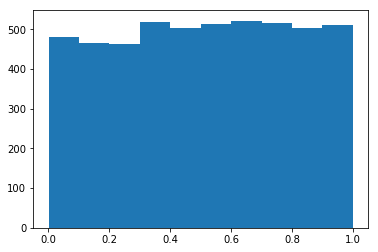

In [402]:
plt.hist(results)

## the random modules

between the standard libraries and the scientific stack, we have access to 3 set of random functions generation:

* random
* numpy.random
* scipy.stats

In [592]:
import random as rn
dir(rn).public

property:
    BPF, LOG4, NV_MAGICCONST, RECIP_BPF, SG_MAGICCONST, TWOPI
class:
    Random: Random number generator base class used by bound module functions.
    SystemRandom: Alternate random number generator using sources provided
function:
    betavariate: Beta distribution.
    choice: Choose a random element from a non-empty sequence.
    choices: Return a k sized list of population elements chosen with replacement.
    expovariate: Exponential distribution.
    gammavariate: Gamma distribution.  Not the gamma function!
    gauss: Gaussian distribution.
    getrandbits: getrandbits(k) -> x.  Generates an int with k random bits.
    getstate: Return internal state; can be passed to setstate() later.
    lognormvariate: Log normal distribution.
    normalvariate: Normal distribution.
    paretovariate: Pareto distribution.  alpha is the shape parameter.
    randint: Return random integer in range [a, b], including both end points.
    random: random() -> x in the interval [0, 1).
  

In [353]:
[f for f in dir(rn) if f.endswith('variate')]

['betavariate',
 'expovariate',
 'gammavariate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'vonmisesvariate',
 'weibullvariate']

In [593]:
import numpy as np
dir(np.random).public

property:
    absolute_import, division, mtrand, np, operator, print_function, test, warnings
class:
    RandomState: RandomState(seed=None)
function:
    Lock: allocate_lock() -> lock object
    beta: beta(a, b, size=None)
    binomial: binomial(n, p, size=None)
    bytes: bytes(length)
    chisquare: chisquare(df, size=None)
    choice: choice(a, size=None, replace=True, p=None)
    dirichlet: dirichlet(alpha, size=None)
    exponential: exponential(scale=1.0, size=None)
    f: f(dfnum, dfden, size=None)
    gamma: gamma(shape, scale=1.0, size=None)
    geometric: geometric(p, size=None)
    get_state: get_state()
    gumbel: gumbel(loc=0.0, scale=1.0, size=None)
    hypergeometric: hypergeometric(ngood, nbad, nsample, size=None)
    laplace: laplace(loc=0.0, scale=1.0, size=None)
    logistic: logistic(loc=0.0, scale=1.0, size=None)
    lognormal: lognormal(mean=0.0, sigma=1.0, size=None)
    logseries: logseries(p, size=None)
    multinomial: multinomial(n, pvals, size=None)
    mu

In [357]:
import scipy.stats as st
dir(st).properties.public

property:
    absolute_import, alpha, anglit, arcsine, argus, bernoulli, beta, betaprime, binom, boltzmann, bradford, burr, burr12, cauchy, chi, chi2, contingency, cosine, crystalball, dgamma, dirichlet, distributions, division, dlaplace, dweibull, erlang, expon, exponnorm, exponpow, exponweib, f, fatiguelife, fisk, foldcauchy, foldnorm, frechet_l, frechet_r, gamma, gausshyper, genexpon, genextreme, gengamma, genhalflogistic, genlogistic, gennorm, genpareto, geom, gilbrat, gompertz, gumbel_l, gumbel_r, halfcauchy, halfgennorm, halflogistic, halfnorm, hypergeom, hypsecant, invgamma, invgauss, invweibull, invwishart, johnsonsb, johnsonsu, kappa3, kappa4, kde, ksone, kstwobign, laplace, levy, levy_l, levy_stable, loggamma, logistic, loglaplace, lognorm, logser, lomax, matrix_normal, maxwell, mielke, morestats, moyal, mstats, mstats_basic, mstats_extras, multinomial, multivariate_normal, mvn, nakagami, nbinom, ncf, nct, ncx2, norm, norminvgauss, ortho_group, pareto, pearson3, planck, poiss

In [377]:
dir(st.gamma).public

property:
    a, b, badvalue, extradoc, generic_moment, moment_type, name, numargs, shapes, vecentropy, xtol
descriptor:
    random_state: @property with getter, setter, Get or set the RandomState object for generating random variates.
function:
    cdf: Cumulative distribution function of the given RV.
    entropy: Differential entropy of the RV.
    expect: Calculate expected value of a function with respect to the
    fit: Return MLEs for shape (if applicable), location, and scale
    fit_loc_scale: Estimate loc and scale parameters from data using 1st and 2nd moments.
    freeze: Freeze the distribution for the given arguments.
    interval: Confidence interval with equal areas around the median.
    isf: Inverse survival function (inverse of `sf`) at q of the given RV.
    logcdf: Log of the cumulative distribution function at x of the given RV.
    logpdf: Log of the probability density function at x of the given RV.
    logsf: Log of the survival function of the given RV.
    me

all thes distributions are described using a **location** and **scale** parameter, and, if necessary, one or more **shape** parameters.

Basically they can describe all translation and scaling of the basic function.

This is usually different from the traditional parametrization, and this can lead to some problems here and there

In [379]:
help(st.gamma.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.gamma_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



these distributions can be used in frozen or unfrozen state.

a frozen distribution has its parameters fixed, while an unfrozen one requires them every time

In [381]:
st.gamma.rvs(2.0, loc=0, scale=1, size=3)

array([1.26527731, 2.04624127, 0.59565769])

In [382]:
dist = st.gamma(2.0, loc=0, scale=1)
dist.rvs(3)

array([0.42775444, 1.07160098, 0.92292052])

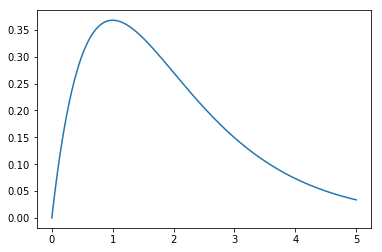

In [388]:
x = np.linspace(0, 5, 1000)
pdf_value = dist.pdf(x)
plt.plot(x, pdf_value)

In [383]:
dist = st.gamma(2.0, loc=0, scale=1)
data = dist.rvs(30)

In [384]:
st.gamma.fit(data)
# alpha, location and scale

(1.3673911820844111, 0.16370902789591774, 1.189440171001709)

location is a shift, and it might not be appropriate for distributions like the gamma!
the fit method allow us to fix it to a certain value

In [385]:
st.gamma.fit(data, floc=0)
# alpha, location and scale

(1.9551561743594468, 0, 0.9155760093744815)

the result is clearly better!

In [386]:
params = st.gamma.fit(data, floc=0)
new_dist = st.gamma(*params)

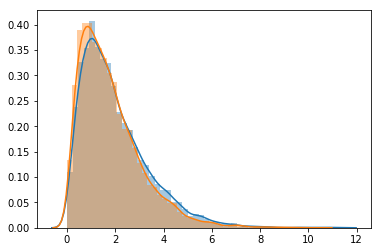

In [387]:
sbn.distplot(dist.rvs(10_000))
sbn.distplot(new_dist.rvs(10_000))

one can notice that the histogram is incorrect, as is doing a kernel density estimation and it has borders that go below zero...

seaborn allows us to use an arbitrary function for showing the distribution, that has to follow the same interface as a scipy distribution:

* a **fit** function that returns a tuple of parameters
* a **pdf** function that takes the parameters and the x positions and returns the pdf values

we could use the distributions directly, but seaborn does not yet allow to configure the fit to remove the location (it should do in the next version after the 0.9), so we have to implement it ourselves

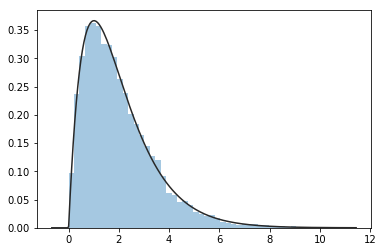

In [394]:
class GammaFitter:
    def fit(self, data):
        return st.gamma.fit(data, floc=0)
    
    def pdf(self, x, *params):
        return st.gamma.pdf(x, *params)
    
sbn.distplot(dist.rvs(10_000), kde=False, fit=GammaFitter())

## Exercise 1

try to implement a more generic fitter for seaborn, that allow to choose wich parameters to fix and can be used, and make it extendible to other distributions of the same kind

## Visualizing the ECDF (Empirical distribution function)

In [649]:
data = plt.randn(4)
data

array([-0.6561222 ,  1.02863093, -0.3788329 ,  0.02472737])

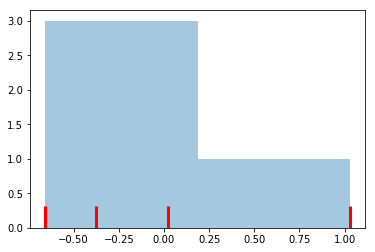

In [650]:
sns.distplot(data, hist=True, kde=False);
sns.rugplot(data, height=0.1, linewidth=3, color='r');

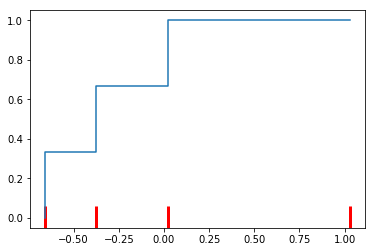

In [651]:
data_sorted = np.sort(data)
index = np.linspace(0, 1, len(data_sorted))
plt.plot(data_sorted, index, linestyle='steps-pre')
sns.rugplot(data, height=0.1, linewidth=3, color='r');

this is a reasonable visualization, but when we are going to use it later, the behavior is going to be closer to this:

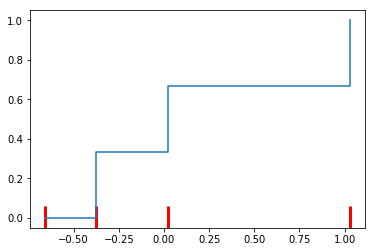

In [652]:
data_sorted = np.sort(data)
index = np.linspace(0, 1, len(data_sorted))
plt.plot(data_sorted, index, linestyle='steps-post')
sns.rugplot(data, height=0.1, linewidth=3, color='r');

to reduce the borders effect, it is better to adjust how we estimate the indexes

(0, 1)

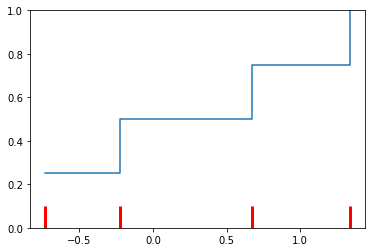

In [630]:
data_sorted = np.sort(data)

index = np.linspace(0, 1, 1+len(data_sorted))
index = index[1:]

plt.plot(data_sorted, index, linestyle='steps-post')
sns.rugplot(data, height=0.1, linewidth=3, color='r');
plt.ylim(0,1)

In [653]:
from enum import Enum
class StepStyle(Enum):
    STEP_POST = 'steps-post'
    STEP_PRE = 'steps-pre'

def plot_ecdf(data, ax=None, style=StepStyle.STEP_PRE):
    if ax is None:
        ax = plt.gca()
    data_sorted = np.sort(data)
    index = np.linspace(0, 1, 1+len(data_sorted))[1:]
    ax.plot(data_sorted, index, linestyle='steps-post')

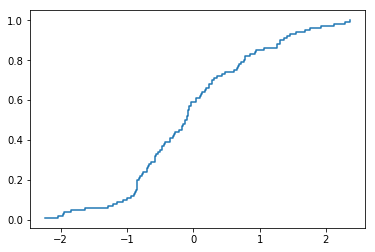

In [654]:
plot_ecdf(plt.randn(100))

In [ ]:
data = (5+plt.randn(100))**2
data_sorted = np.sort(data)
est_ecdf = np.linspace(0, 1, len(data_sorted)+1)[1:]

dist = st.gamma
params = dist.fit(data_sorted)
frozen = dist(*params)
teo_ecdf = 1-frozen.sf(data_sorted)

Text(0.5, 1.0, 'quantile quantile plot')

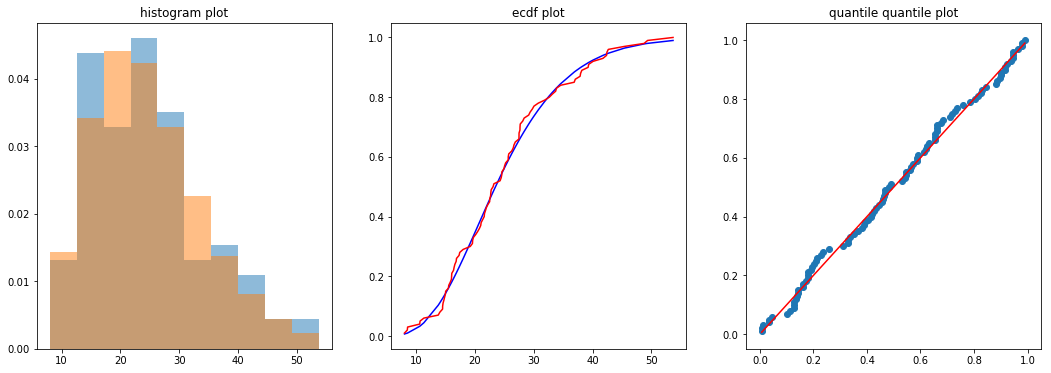

In [658]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

counts, bins, _ = ax0.hist(data, density=True, alpha=0.5)
ax0.hist(frozen.rvs(100_000), density=True, bins=bins, alpha=0.5)
ax0.set_title("histogram plot")

ax1.plot(data_sorted, teo_ecdf, color='b')
ax1.plot(data_sorted, est_ecdf, color='r')
ax1.set_title("ecdf plot")

ax2.scatter(teo_ecdf, est_ecdf)
ax2.plot(teo_ecdf, teo_ecdf, color='r')
ax2.set_title("quantile quantile plot")

## Generating numbers with the ECDF

In [343]:
plt.rand()

0.13041370191935675

In [346]:
data = (5+plt.randn(100))**2
data_sorted = np.sort(data)
est_ecdf = np.linspace(0, 1, 1+len(data_sorted))[1:]

In [347]:
p = plt.rand()
idx = np.searchsorted(est_ecdf, p)
val = data_sorted[idx]
val

20.115462913749713

In [348]:
p = plt.rand(10)
idx = np.searchsorted(est_ecdf, p)
val = data_sorted[idx]
val

array([28.78496923, 31.64769229, 35.78583449, 35.78583449, 32.61468568,
       20.35828101, 16.95870004, 18.15856544, 35.78583449, 18.14873844])

In [349]:
p = plt.rand(100_000)
idx = np.searchsorted(est_ecdf, p)
generated = data_sorted[idx]

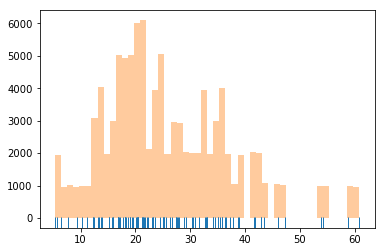

In [350]:
sns.distplot(data, hist=False, kde=False, rug=True);
sns.distplot(generated, hist=True, kde=False, rug=False);

## Monte Carlo methods

a collection of methods that uses random sequences to estimate the average value of some specific functions, often integrals.

we saw an example of this when we estimated the value of $\pi$ using random numbers

$$ \int_{[0,1]^s} f(u)\,{\rm d}u \approx \frac{1}{N}\,\sum_{i=1}^N f(x_i). $$

the rate of convergence by using N random numbers is $O\left(\frac{1}{\sqrt{N}}\right)$

There are better methods for exploring a function if we can, and that is by using **low-discrepancy sequences**.

These are sequences that looks quite random, but do not tend to cluster as random numbers do, covering the space in a more uniform way.

low-discrepancy sequences converge with $O\left(\frac{1}{N}\right)$, but they are a little more difficult to implement.

These methods are called quasi-Monte Carlo, as they are not using proper pseudo-random numbers

The simplest low-discrepancy sequence is the **Van der Corput sequence**, and is quite easy to implement:

the denominators are increasing powers of the base, the numerators are all the values in that base, but sorted base on the last digit (skipping the numbers that ends in 0, as they would simplify and recreate previous ones)

$$\left\{ \tfrac{1}{10}, \tfrac{2}{10}, \tfrac{3}{10}, \tfrac{4}{10}, \tfrac{5}{10}, \tfrac{6}{10}, \tfrac{7}{10}, \tfrac{8}{10}, \tfrac{9}{10}, \tfrac{01}{100}, \tfrac{11}{100}, \tfrac{21}{100}, \tfrac{31}{100}, \tfrac{41}{100}, \tfrac{51}{100}, \tfrac{61}{100}, \tfrac{71}{100}, \tfrac{81}{100}, \tfrac{91}{100}, \tfrac{02}{100}, \tfrac{12}{100}, \tfrac{22}{100}, \tfrac{32}{100}, \ldots \right\}$$

In [469]:
def vdc(n, base=2):
    vdc = 0
    denom = 1
    while n:
        denom *= base
        n, remainder = divmod(n, base)
        vdc += remainder / denom
    return vdc

def avdn(n, base=10):
    return np.array([vdc(i, base=base) for i in range(1, n+1)])

In [470]:
avdn(11)

array([0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.01, 0.11])

In [633]:
from fractions import Fraction
[vdc(i, base=Fraction(10)) for i in range(1, 11)]

[Fraction(1, 10),
 Fraction(1, 5),
 Fraction(3, 10),
 Fraction(2, 5),
 Fraction(1, 2),
 Fraction(3, 5),
 Fraction(7, 10),
 Fraction(4, 5),
 Fraction(9, 10),
 Fraction(1, 100)]

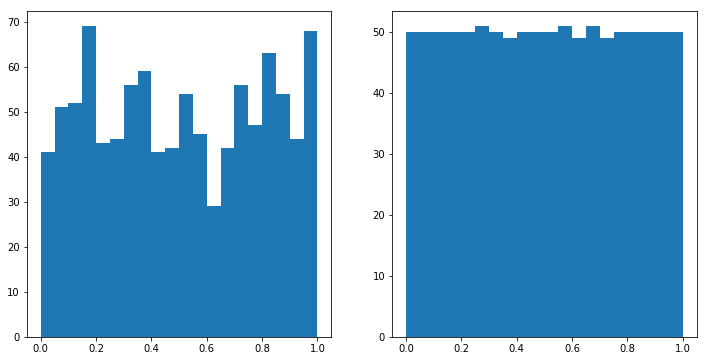

In [638]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
bins = np.linspace(0, 1, 21)
ax1.hist(np.random.rand(1000), bins=bins)
ax2.hist(avdn(1000), bins=bins);

being a uniform sample generator, one can then use this to generate arbitrary random variables!

for example, to combined them to generate normally distributed data, we can use the **isf** function of the distributions!

In [473]:
st.norm.isf(0.2)

0.8416212335729142

In [474]:
st.norm.isf(0.9)

-1.2815515655446004

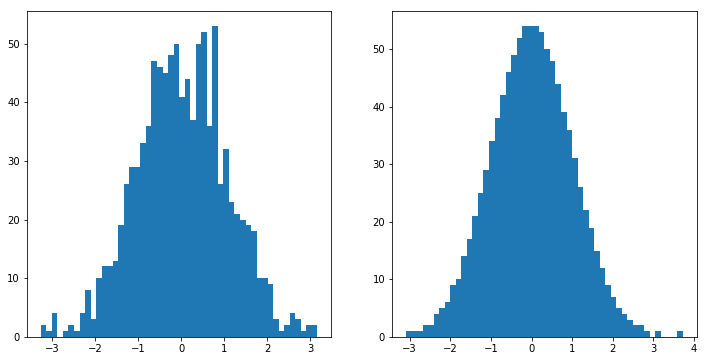

In [639]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(plt.randn(1000), bins=50);

vdn_sample = avdn(1000)
gaussian_samples = st.norm.isf(vdn_sample)
ax2.hist(gaussian_samples, bins=50);

the Van der Corput sequence can be generalized to multiple dimensions at the same time by the **Halton sequence**, that is generated in a similar fashion

A general library to generate these sequences in high dimensions is provided by the library **SALib**.

You won't need it for today, but for real use, where the number of dimensions is high, it might be worth using it.

In [512]:
from SALib.sample import saltelli

In [572]:
problem = {
    'num_vars': 2,
    'names': ['x1', 'x2'],
    'bounds': [[0, 1],
               [0, 1],]
}

In [573]:
param_values = saltelli.sample(problem, 100)

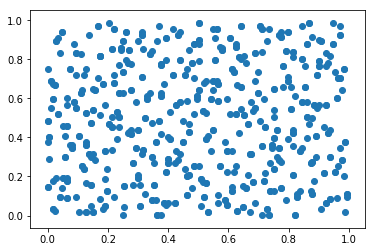

In [574]:
plt.scatter(*param_values.T)

## MonteCarlo simulations

evolve the state of a system given a probability of transition from each state

The master equation example: I have a system where I want to keep track of the number of molecules in an environment.

the number of molecules can change due to two different processes:
* a particle from the outside can come in with a probability that is constant (or can be approximated as such)
* a particle can escape the system, with a probability that is constant for each particle (so the total probability is proportional to the number of particles)

In [640]:
def removal(state):
    return state*0.1

def increase(state):
    return 1

transitions = [removal, increase]
transitions_names = ['removal', 'increase']

In [641]:
state = 5

In [642]:
rates = [f(state) for f in transitions]
rates

[0.5, 1]

### the Stochastic Simulation Algorithm

the total rate $\lambda_{tot}$ is the sum of the rates

the chance of each one happening is the proportion compared to the total rate

the time for which the system keeps being in the same state is distributed with an exponential time $\tau = \lambda_{tot}^{-1}$

In [643]:
total_rate = sum(rates)
total_rate

1.5

In [644]:
time = np.random.exponential(1/total_rate)
time

0.21233439649538016

### choosing the transition

we can use the same sampling method as before!

In [645]:
normalized_rates = np.cumsum(rates)
normalized_rates /= normalized_rates[-1]
normalized_rates

array([0.33333333, 1.        ])

In [646]:
p = plt.rand()
idx = np.searchsorted(normalized_rates, p)
idx

1

In [647]:
event = transitions_names[idx]
event

'increase'

With python 3.6 onward, we can actually replace this with a simple call to choices, that handles weighted extractions

In [648]:
rn.choices(transitions_names, weights=rates)

['removal']

## exercise 1

put all together: implement a cycle that implements this master equation, and check that the resulting distribution should converge to a poisson distribution with mean 10

remember that the weight of each state should be the proportion of time that the system spent into that state compared with the normal time.

it is **NOT** the just the number of times that the state has been visited

## sensitivity analysis of ODE with random numbers

In [ ]:
from scipy.integrate import odeint

def exponential_deriv(state, time, alpha):
    return -alpha*state

time = np.linspace(0, 5, 21)
y0 = 1
α = 0.3

In [ ]:
res = odeint(exponential_deriv, y0=y0, t=time, args=(α, ))

In [604]:
res = pd.DataFrame(res, columns=['y'])
res['time'] = time
res['α'] = α

res.head()

,y,time,α
0,1.000000,0.00,0.3
1,0.927744,0.25,0.3
2,0.860708,0.50,0.3
3,0.798516,0.75,0.3
4,0.740818,1.00,0.3


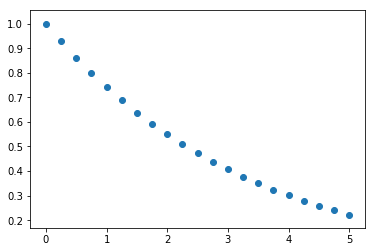

In [605]:
plt.scatter(x='time', y='y', data=res)

In [612]:
def exponential_deriv(state, time, alpha):
    return -alpha*state

time = np.linspace(0, 5, 2**4+1)
results = []
alphas = np.exp(np.random.randn(100)*0.1)

for idx, α in enumerate(alphas):
    res = odeint(exponential_deriv, y0=1, t=time, args=(α, ))
    res = pd.DataFrame(res, columns=['y'])
    res['time'] = time
    res['α'] = α
    res['simulation_run'] = idx
    results.append(res)
results = pd.concat(results)

In [613]:
results.head()

,y,time,α,simulation_run
0,1.000000,0.0000,0.877383,0
1,0.760194,0.3125,0.877383,0
2,0.577894,0.6250,0.877383,0
3,0.439312,0.9375,0.877383,0
4,0.333962,1.2500,0.877383,0


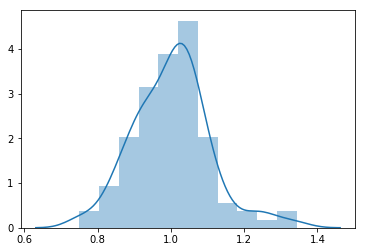

In [614]:
sns.distplot(alphas);

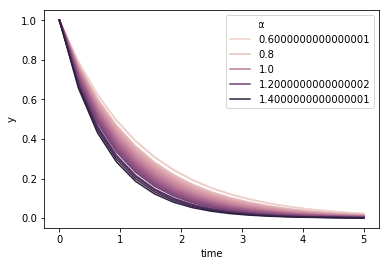

In [615]:
sns.lineplot("time", 'y', data=results, estimator=None, units='simulation_run', hue='α')

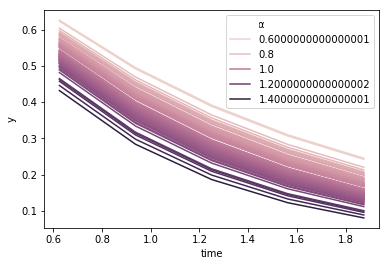

In [616]:
sns.lineplot("time", 'y', data=results.query("time>0.5 and time<2"),
             estimator=None, units='simulation_run', hue='α')

In [582]:
def exponential_deriv(state, time, alpha):
    return -alpha*state

time = np.linspace(0, 5, 2**4+1)
results = []

vdn_sample = avdn(100)
gaussian_samples = st.norm.isf(vdn_sample)
alphas = np.exp(gaussian_samples*0.1)
    
for idx, α in enumerate(alphas):
    res = odeint(exponential_deriv, y0=1, t=time, args=(α, ))
    res = pd.DataFrame(res, columns=['y'])
    res['time'] = time
    res['α'] = α
    res['simulation_run'] = idx
    results.append(res)
results = pd.concat(results)

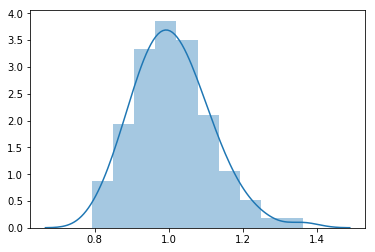

In [583]:
sns.distplot(alphas)

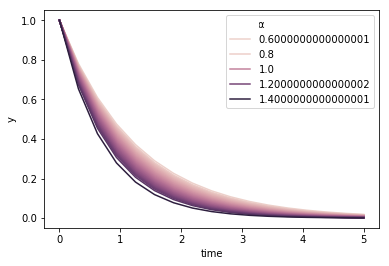

In [584]:
sns.lineplot("time", 'y', data=results, estimator=None, units='simulation_run', hue='α')

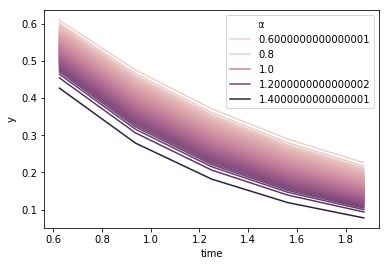

In [585]:
sns.lineplot("time", 'y', data=results.query("time>0.5 and time<2"),
             estimator=None, units='simulation_run', hue='α')